In [3]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt

In [9]:
def F_standardize(X):

    X -= np.mean(X, axis=0, keepdims=True)
    X /= (np.std(X, axis=0, keepdims=True) + 1e-16)
    return X

def F_sigmoid(x):

    return 1 / (1 + np.exp(-x))

def F_relu(x):

    return x * (x > 0)

def F_dRelu(x):
    """Computes the derivative of the Rectified Linear Unit activation function"""
    x[x<=0] = 0
    x[x>0] = 1
    return x

def F_computeCost(hat_y, y):

    m = y.shape[0]


    loss =  -(y*np.log(hat_y) + (1-y)*np.log(1-hat_y))

    cost = np.sum(loss)/m
    return cost

def F_computeAccuracy(hat_y, y):


    m = y.shape[0]
    class_y = np.copy(hat_y)
    class_y[class_y>=0.5]=1
    class_y[class_y<0.5]=0
    return np.sum(class_y==y) / m

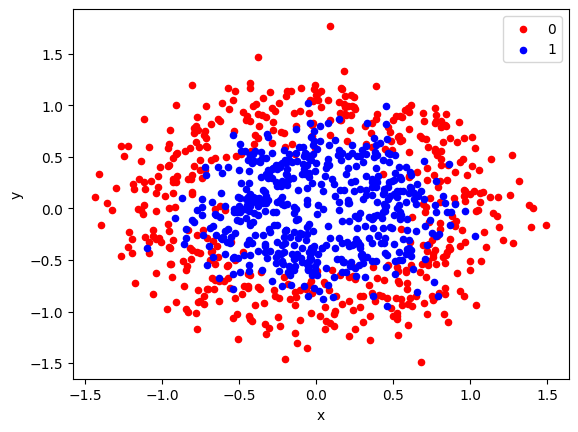

In [10]:
X, y = datasets.make_circles(n_samples=1000, noise=0.2, factor=0.5)

from pandas import DataFrame
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [11]:
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print(set(y))

X = F_standardize(X)


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#  proper shape: (m,) -> (m, 1)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

#oneHotEncoding: (nbExamples, 1) -> (nbExamples, nbClass)
n_0 = X_train.shape[1]
n_2 = 1

print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("n_0=n_in: {} n_2=n_out: {}".format(n_0, n_2))

X.shape: (1000, 2)
y.shape: (1000,)
{np.int64(0), np.int64(1)}
X_train.shape: (800, 2)
X_test.shape: (200, 2)
y_train.shape: (800, 1)
y_test.shape: (200, 1)
y_train.shape: (800, 1)
y_test.shape: (200, 1)
n_0=n_in: 2 n_2=n_out: 1


In [12]:
class C_MultiLayerPerceptron:


    W1, b1, W2, b2 = [], [], [], []
    A0, Z1, A1, Z2, A2 = [], [], [], [], []
    dW1, db1, dW2, db2 = [], [], [], []
    dZ1, dA1, dZ2 = [], [], []
    # for momentum
    VdW1, Vdb1, VdW2, Vdb2 = [], [], [], []

    def __init__(self, n_0, n_1, n_2):
        self.W1 = np.random.randn(n_0, n_1) * 0.01
        self.b1 = np.zeros(shape=(1, n_1))
        self.W2 = np.random.randn(n_1, n_2) * 0.01
        self.b2 = np.zeros(shape=(1, n_2))
        #for momentum
        self.VdW1 = np.zeros(shape=(n_0, n_1))
        self.Vdb1 = np.zeros(shape=(1, n_1))
        self.VdW2 = np.zeros(shape=(n_1, n_2))
        self.Vdb2 = np.zeros(shape=(1, n_2))
        return


    def __setattr__(self, attrName, val):
        if hasattr(self, attrName):
            self.__dict__[attrName] = val
        else:
            raise Exception("self.%s note part of the fields" % attrName)



    def M_forwardPropagation(self, X):

        self.A0 = X

        self.Z1 = np.dot(self.A0,self.W1)+self.b1
        self.A1 = F_relu(self.Z1)

        self.Z2 = np.dot(self.A1,self.W2)+self.b2
        self.A2 = F_sigmoid(self.Z2)

        hat_y = self.A2



        return hat_y


    def M_backwardPropagation(self, X, y):

        m = y.shape[0]



        self.dZ2 = self.A2 - y
        self.dW2 = 1/m*self.A1.T @ self.dZ2
        self.db2 = np.mean(self.dZ2)
        self.dA1 = self.dZ2 @ self.W2.T

        self.dZ1 = self.dA1 * F_dRelu(self.Z1)
        self.dW1 = 1/m*X.T @ self.dZ1
        self.db1 = np.mean(self.dZ1)


        return


    def M_gradientDescent(self, alpha):

        self.W1 =self.W1-alpha*self.dW1
        self.b1 = self.b1-alpha*self.db1
        self.W2 = self.W2-alpha*self.dW2
        self.b2 = self.b2-alpha*self.db2


        return


    def M_momentum(self, alpha, beta):
        """
        alpha: float scalar
            amount of update at each step of the gradient descent
        beta: float scalar
            momentum term
        """


        self.VdW1 = beta*self.VdW1+(1-beta)*self.dW1
        self.W1 =self.W1- alpha*self.VdW1
        self.Vdb1= beta*self.Vdb1 +(1-beta)*self.db1
        self.b1 =self.b1-alpha*self.Vdb1
        self.VdW2 =beta*self.VdW2+(1-beta)*self.dW2
        self.W2 = self.W2-alpha*self.VdW2
        self.Vdb2 =beta*self.Vdb2 +(1-beta)*self.db2
        self.b2 = self.b2- alpha*self.Vdb2



        return

In [13]:

# hyper-parameters
n_1 = 10 # numberof hidden neurons
nb_epoch = 5000 # number of epochs (number of iterations over full training set)
alpha=0.1 # learning rate
beta=0.9 # beta parameters for momentum


# the size of the various layers (n_0=n_input, n_1=n_hidden, n_2=n_output)
myMLP = C_MultiLayerPerceptron(n_0, n_1, n_2)

train_cost, train_accuracy, test_cost, test_accuracy = [], [], [], []

#Run over epochs
for num_epoch in range(0, nb_epoch):


    hat_y_train = myMLP.M_forwardPropagation(X_train)


    train_cost.append( F_computeCost(hat_y_train, y_train) )
    train_accuracy.append( F_computeAccuracy(hat_y_train, y_train) )

    myMLP.M_backwardPropagation(X_train, y_train)

    myMLP.M_gradientDescent(alpha)


    # Stores results on test
    hat_y_test = myMLP.M_forwardPropagation(X_test)
    test_cost.append( F_computeCost(hat_y_test, y_test) )
    test_accuracy.append( F_computeAccuracy(hat_y_test, y_test) )

    if (num_epoch % 500)==0:
        print("epoch: {0:d} (cost: train {1:.2f} test {2:.2f}) (accuracy: train {3:.2f} test {4:.2f})".format(num_epoch, train_cost[-1], test_cost[-1], train_accuracy[-1], test_accuracy[-1]))

epoch: 0 (cost: train 0.69 test 0.69) (accuracy: train 0.49 test 0.39)
epoch: 500 (cost: train 0.67 test 0.69) (accuracy: train 0.59 test 0.51)
epoch: 1000 (cost: train 0.45 test 0.50) (accuracy: train 0.86 test 0.81)
epoch: 1500 (cost: train 0.31 test 0.38) (accuracy: train 0.89 test 0.85)
epoch: 2000 (cost: train 0.28 test 0.36) (accuracy: train 0.89 test 0.85)
epoch: 2500 (cost: train 0.27 test 0.36) (accuracy: train 0.89 test 0.86)
epoch: 3000 (cost: train 0.26 test 0.36) (accuracy: train 0.89 test 0.86)
epoch: 3500 (cost: train 0.26 test 0.36) (accuracy: train 0.89 test 0.86)
epoch: 4000 (cost: train 0.26 test 0.36) (accuracy: train 0.89 test 0.86)
epoch: 4500 (cost: train 0.26 test 0.36) (accuracy: train 0.89 test 0.86)


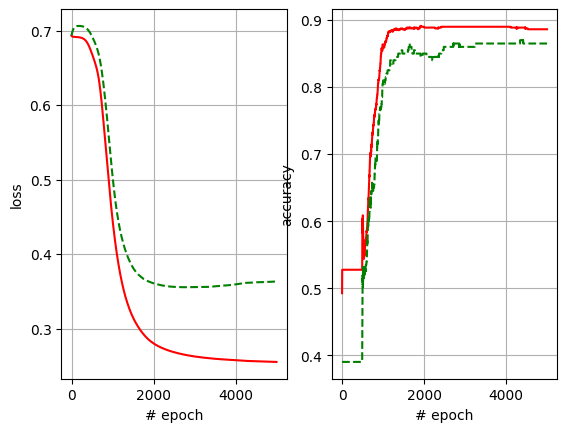

In [14]:
plt.subplot(1,2,1)
plt.plot(train_cost, 'r')
plt.plot(test_cost, 'g--')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r')
plt.plot(test_accuracy, 'g--')
plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.grid(True)